## Day 15

https://adventofcode.com/2024/day/15

### Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

EMPTY = 0
WALL  = 1
ROBOT = 5
BOX   = 2
BOXLEFT = BOX
BOXRIGHT = 3

def read_input_15(filename):
    f = open(filename)
    inp = f.read().split("\n\n")
    instructions = inp[1].replace("\n","")
    lines = inp[0].split()
    grid = np.zeros((len(lines),len(lines[0])),dtype=int)
    robot = (0,0)
    for r,l in enumerate(lines):
        for c,v in enumerate(l):
            if v=="#":
                grid[r,c] = WALL
            elif v=="O":
                grid[r,c] = BOX
            elif v=="@":
                grid[r,c] = ROBOT
                robot = (r,c)
    return grid,robot,instructions 

moves = {"<": (0,-1), ">": (0,+1), "^": (-1,0), "v": (+1,0)}

def items_to_move_simple(instr,grid,robot):
    dr,dc = moves[instr]
    to_be_moved = [robot]
    p = robot
    while True:
        rp,cp = p
        r1,c1 = rp+dr,cp+dc
        if grid[r1,c1]==WALL:
            return []
        if grid[r1,c1]==EMPTY:
            return to_be_moved
        to_be_moved.append((r1,c1))
        p = r1,c1

def move_boxes(to_be_moved,instr,grid,robot):
    if len(to_be_moved):
        dr,dc = moves[instr]
        values = [ grid[r,c] for r,c in to_be_moved ]
        # clean region to be moved (needed for part 2, since items to move are not on straight line)
        for (r,c) in to_be_moved: 
            grid[r,c] = EMPTY
        for (r,c),v in zip(to_be_moved,values):
            rn,cn = r+dr,c+dc
            grid[rn,cn] = v
        r,c = robot
        grid[r,c] = EMPTY
        robot = to_be_moved[0][0]+dr,to_be_moved[0][1]+dc
    return grid, robot    

def evolve_grid(grid,robot,instructions,animate=False):
    
    camera = None
    if animate:
        f = plt.figure(figsize=(5,5),dpi=100)
        ax = f.add_axes([0, 0, 1, 1])
        ax.axis('off')
        camera = Camera(f)
        plt.imshow(grid)
        camera.snap()
        
    for instr in instructions:
        to_be_moved = items_to_move_simple(instr,grid,robot)
        grid,robot = move_boxes(to_be_moved,instr,grid,robot)
        
        if animate:
            plt.imshow(grid)
            camera.snap()
            
    return grid,robot,camera

def sum_gps(grid):
    sumgps = 0
    for r,l in enumerate(grid):
        for c,v in enumerate(l):
            if v==BOX:
                sumgps += 100*r+c
    return sumgps

2028

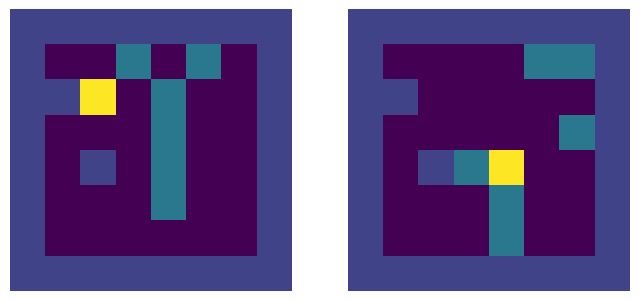

In [2]:
filename = "examples/example15-1.txt"
grid,robot,instructions = read_input_15(filename)

fig, axs = plt.subplots(1,2,figsize=(8,4),dpi=100)

axs[0].imshow(grid)
axs[0].set_axis_off()

grid,robot,_ = evolve_grid(grid,robot,instructions)

axs[1].imshow(grid)
axs[1].set_axis_off()

sum_gps(grid)

10092

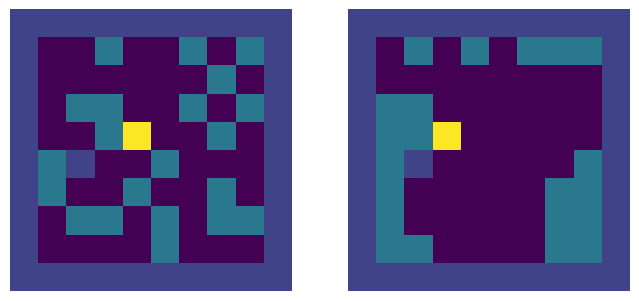

In [3]:
filename = "examples/example15-2.txt"
grid,robot,instructions = read_input_15(filename)

fig, axs = plt.subplots(1,2,figsize=(8,4),dpi=100)

axs[0].imshow(grid)
axs[0].set_axis_off()

grid,robot,_ = evolve_grid(grid,robot,instructions)

axs[1].imshow(grid)
axs[1].set_axis_off()

sum_gps(grid)

1463512

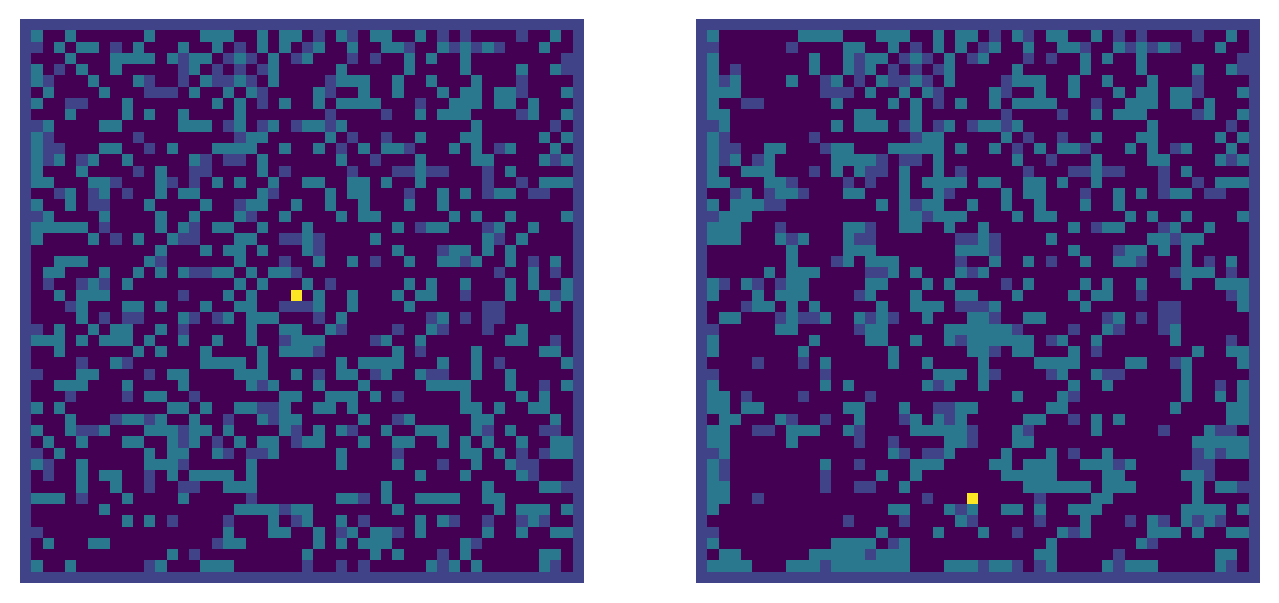

In [4]:
filename = "AOC2024inputs/input15.txt"
grid,robot,instructions = read_input_15(filename)

fig, axs = plt.subplots(1,2,figsize=(8,4),dpi=200)

axs[0].imshow(grid)
axs[0].set_axis_off()

grid,robot,_ = evolve_grid(grid,robot,instructions)

axs[1].imshow(grid)
axs[1].set_axis_off()

sum_gps(grid)

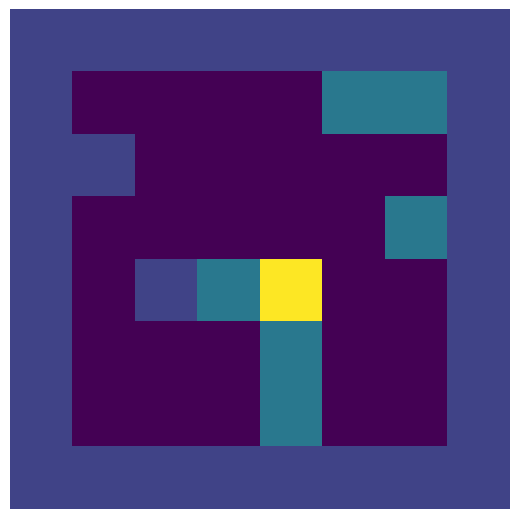

In [5]:
filename = "examples/example15-1.txt"
grid,robot,instructions = read_input_15(filename)

grid,robot,camera = evolve_grid(grid,robot,instructions,animate=True)

anim = camera.animate(blit=True)
anim.save("visualisation/day15animation_test11.gif",writer='pillow')

![Robot1](visualisation/day15animation_test11.gif)

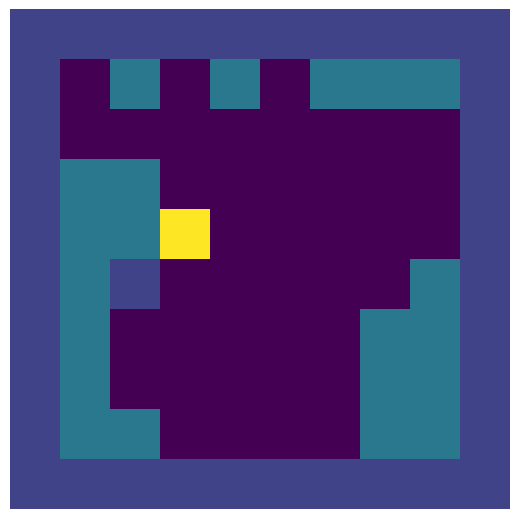

In [6]:
filename = "examples/example15-2.txt"
grid,robot,instructions = read_input_15(filename)

grid,robot,camera = evolve_grid(grid,robot,instructions,animate=True)

anim = camera.animate(blit=True)
anim.save("visualisation/day15animation_test12.gif",writer='pillow')

![Robot1](visualisation/day15animation_test12.gif)

### Part 2

In [7]:
def expand_grid(grid,robot):
    gridnew = np.zeros((len(grid),2*len(grid[0])),dtype=int)
    robotnew = robot
    for r,l in enumerate(grid):
        for c,v in enumerate(l):
            if v==BOX:
                gridnew[r,2*c] = BOX
                gridnew[r,2*c+1] = BOXRIGHT
            elif v==ROBOT:
                gridnew[r,2*c] = grid[r,c]
                robotnew = (r,2*c)
            elif v==WALL:
                gridnew[r,2*c] = WALL
                gridnew[r,2*c+1] = WALL
    return gridnew,robotnew

(4, 8)


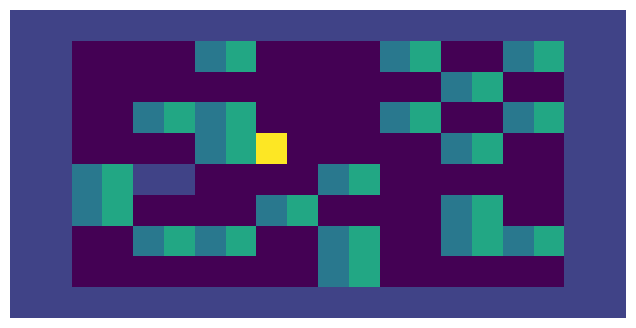

In [8]:
filename = "examples/example15-2.txt"
grid,robot,instructions = read_input_15(filename)
gridnew,robotnew = expand_grid(grid,robot)

fig, ax = plt.subplots(figsize=(8,4),dpi=100)

ax.imshow(gridnew)
ax.set_axis_off()

print(robotnew)

In [9]:
from queue import Queue

def items_to_move_vertical(instr,grid,robot):
    dr,dc = moves[instr]
    rr,cr = robot
    r1,c1 = rr+dr,cr+dc
    if grid[r1,c1]==WALL:
        return []
    elif grid[r1,c1]==EMPTY:
        return [robot]
        
    to_be_moved = [robot]

    if grid[r1,c1]==BOXLEFT:
        box = ((r1,c1),(r1,c1+1))
    else:
        box = ((r1,c1-1),(r1,c1))

    boxes = Queue()
    boxes.put(box)
    visited = set() # keep track each considered box, since they might overlap two boxes
    
    while not boxes.empty():
        box = boxes.get()
        if box in visited:
            continue
        visited.add(box)
        for coord in box:
            to_be_moved.append(coord)
            rb, cb = coord
            nextbox = None
            r1,c1 = rb+dr,cb+dc 
            if grid[r1,c1]==WALL:
                return []
            if grid[r1,c1]==EMPTY:
                continue
            if grid[r1,c1]==BOXLEFT:
                nextbox = ((r1,c1),(r1,c1+1))
            else:
                nextbox = ((r1,c1-1),(r1,c1))
            if nextbox and nextbox not in visited:
                boxes.put(nextbox)

    return to_be_moved

def evolve_grid_2(grid,robot,instructions,animate=False):

    camera = None
    if animate:
        f = plt.figure(figsize=(6,3),dpi=100)
        ax = f.add_axes([0, 0, 1, 1])
        ax.axis('off')
        ax.set_axis_off()
        camera = Camera(f)
        plt.imshow(grid)
        
    for instr in instructions:
        
        if instr=="<" or instr==">": # horizontal movements as in part 1 
            to_be_moved = items_to_move_simple(instr,grid,robot)
        else: # vertical movements
            to_be_moved = items_to_move_vertical(instr,grid,robot)
        
        grid,robot = move_boxes(to_be_moved,instr,grid,robot)
        
        if animate:
            plt.imshow(grid)
            camera.snap()

    return grid,robot,camera

618

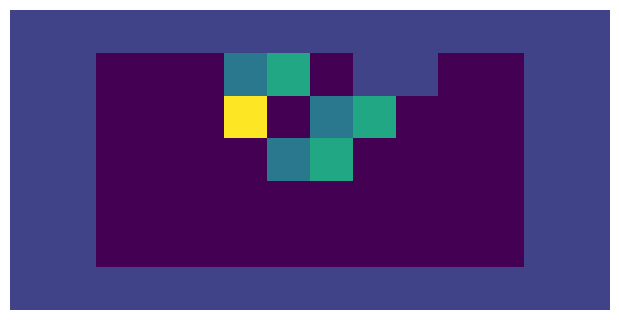

In [10]:
filename = "examples/example15-3.txt"
grid,robot,instructions = read_input_15(filename)
gridnew,robotnew = expand_grid(grid,robot)

gridnew,robotnew,camera = evolve_grid_2(gridnew,robotnew,instructions,animate=True)

sum_gps(gridnew)

In [11]:
anim = camera.animate(blit=True)
anim.save("visualisation/day15animation_test21.gif",writer='pillow')

![Robot2](visualisation/day15animation_test21.gif)

9701

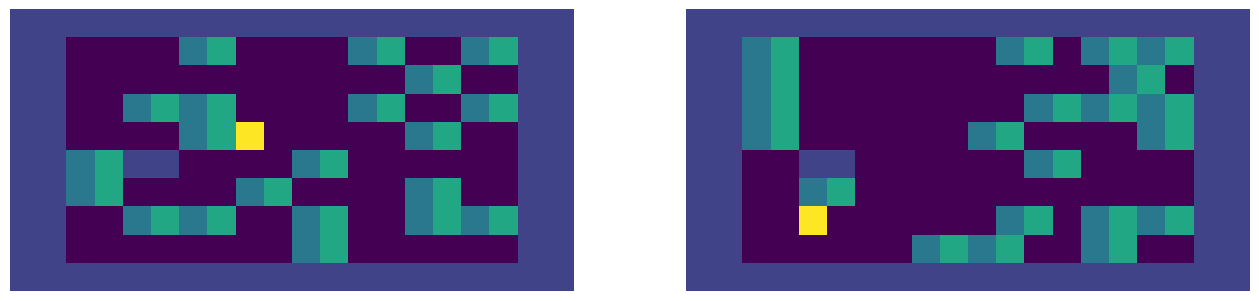

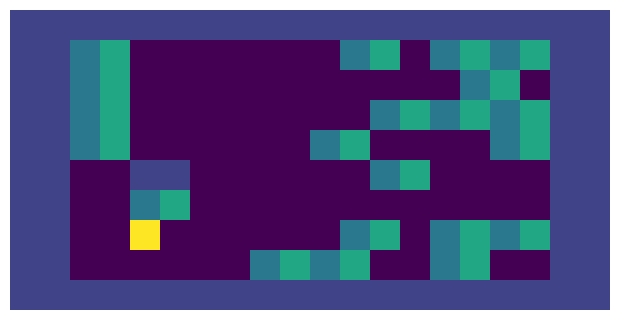

In [12]:
filename = "examples/example15-2.txt"
grid,robot,instructions = read_input_15(filename)
gridnew,robotnew = expand_grid(grid,robot)

fig, axs = plt.subplots(1,2,figsize=(16,4),dpi=100)

axs[0].imshow(gridnew)
axs[0].set_axis_off()

gridnew,robotnew,camera = evolve_grid_2(gridnew,robotnew,instructions,animate=True)

axs[1].imshow(gridnew)
axs[1].set_axis_off()

sum_gps(grid)

In [13]:
anim = camera.animate(blit=True)
anim.save("visualisation/day15animation_test22.gif",writer='pillow')

![Robot2](visualisation/day15animation_test21.gif)

1464380

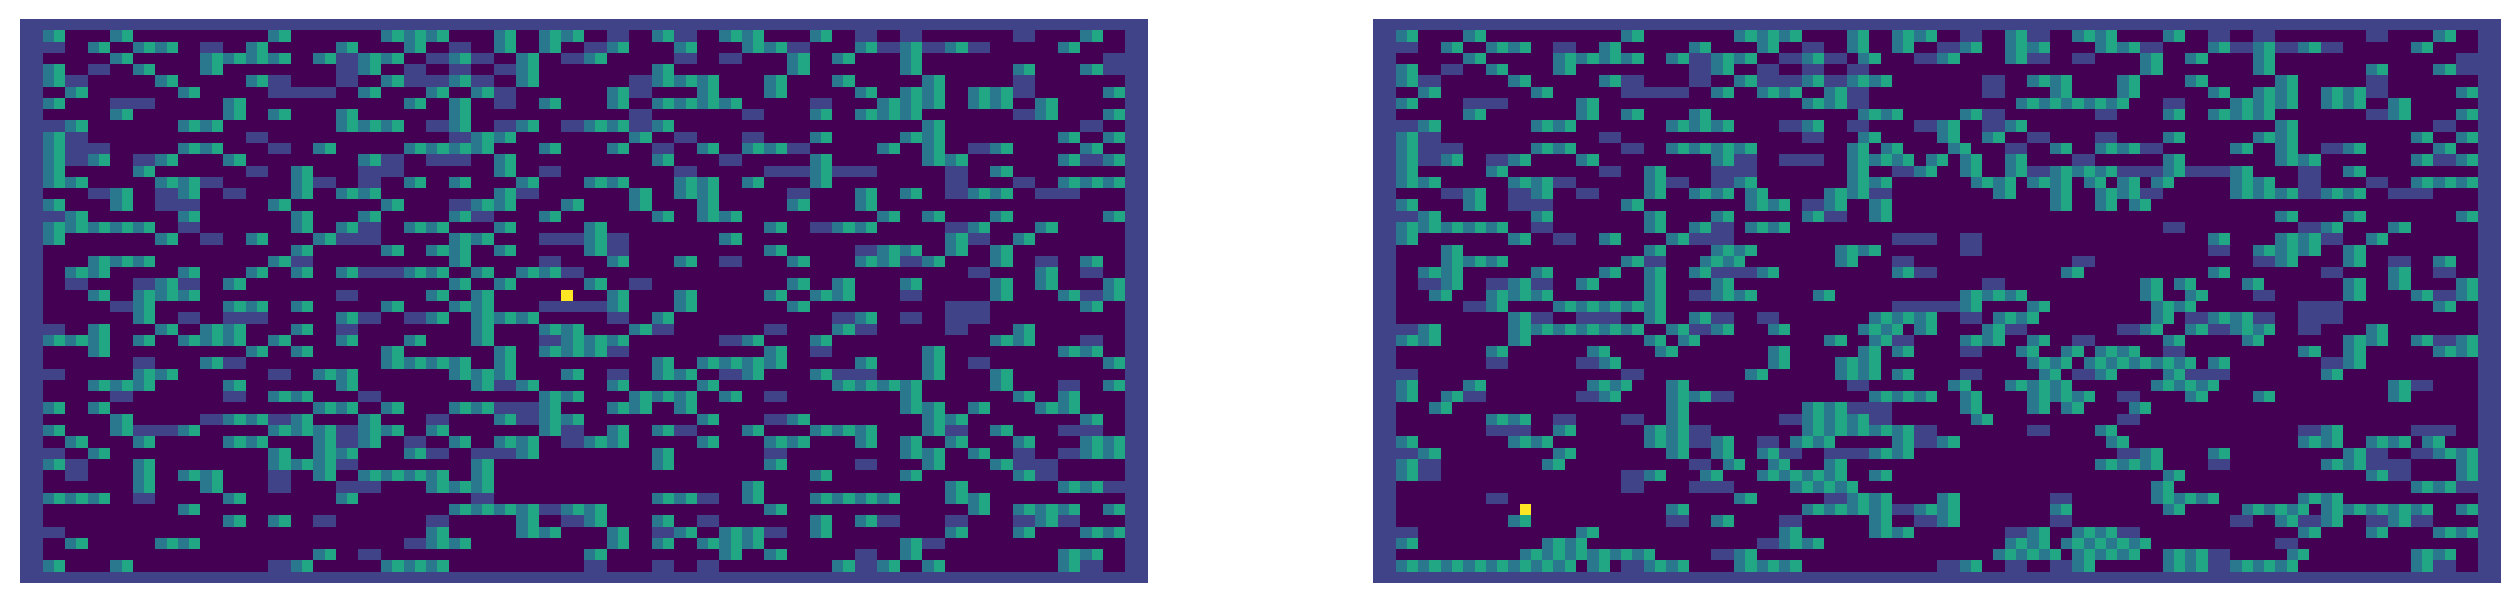

In [14]:
filename = "AOC2024inputs/input15.txt"
grid,robot,instructions = read_input_15(filename)
gridnew,robotnew = expand_grid(grid,robot)

fig, axs = plt.subplots(1,2,figsize=(16,4),dpi=200)

axs[0].imshow(gridnew)
axs[0].set_axis_off()

gridnew,robotnew,_ = evolve_grid_2(gridnew,robotnew,instructions)

axs[1].imshow(gridnew)
axs[1].set_axis_off()

sum_gps(grid)

### Full input animations

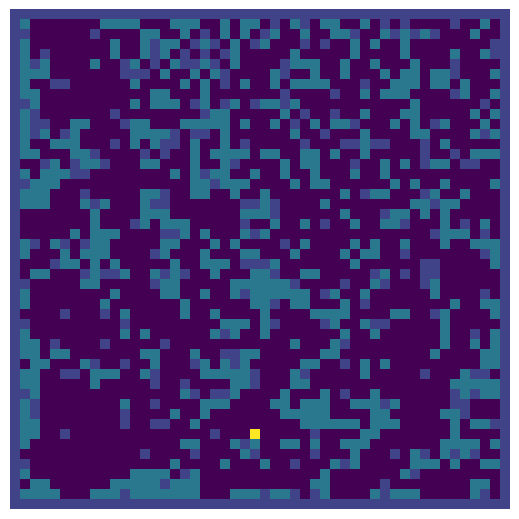

In [15]:
filename = "AOC2024inputs/input15.txt"
grid,robot,instructions = read_input_15(filename)

grid,robot,camera_full1 = evolve_grid(grid,robot,instructions,animate=True)

In [16]:
#anim1 = camera_full1.animate(blit=True)
#anim1.save("visualisation/day15animation_part1.gif",writer='pillow')
#anim1.save("visualisation/day15animation_part1.mp4")

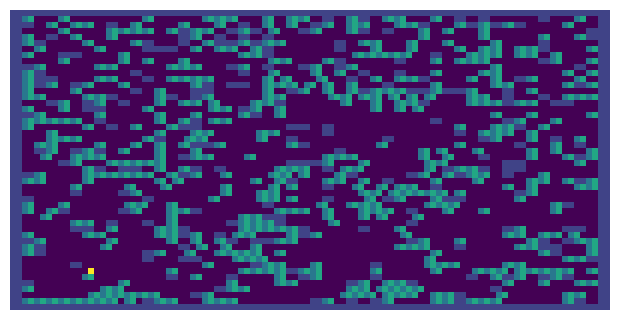

In [17]:
filename = "AOC2024inputs/input15.txt"
grid,robot,instructions = read_input_15(filename)
gridnew,robotnew = expand_grid(grid,robot)

gridnew,robotnew,camera_full2 = evolve_grid_2(gridnew,robotnew,instructions,animate=True)

In [21]:
#anim2 = camera_full2.animate(blit=True)
#anim2.save("visualisation/day15animation_part2.gif",writer='pillow')
#anim2.save("visualisation/day15animation_part2.mp4")